# Clustering and Removal of Outliers

- In this mini project I will be making use of python and some of its necessary libraries to create clusters in a dataset and remove outliers in the dataset.<br>
- I will be making use of the _**GlobalLandTemperaturesByState.csv**_ dataset. This dataset contains the temperature of different states at different times.<br>
- I will start the process by importing the necessary libraries.


- **Note: "We will be working with the temperture columns only".**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Reading the information in the dataset

- The information or table in the dataset is read and assigned to a variable **df**.

In [70]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [71]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [72]:
df.head() #Getting the first give rows

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


## Describing the data in the dataset

In [73]:
df.describe() 

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


## A visual representation of the temperatures in the dataset

In [74]:
df.boxplot()

<Axes: >

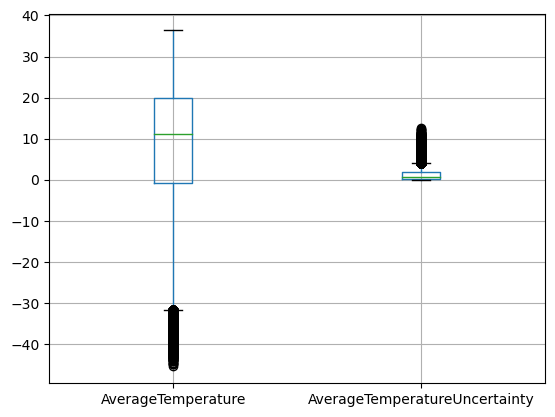

In [75]:
plt.show()

## Data Transformation

- Here the two temperatures **AverageTemperature** and **AverageTemperatureUncertainty** are being transformed using the function **StandardScaler()**

In [76]:
numeric_columns = ['AverageTemperature', 'AverageTemperatureUncertainty']
df_numeric = df[numeric_columns]
scaler = StandardScaler()

In [77]:
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns = ["Column1", "Column2"])
df_scaled = df_scaled.dropna()

In [78]:
df_scaled

,Column1,Column2
0,1.201766,-0.085745
1,1.106211,-0.135731
2,1.116594,-0.179101
3,1.193271,-0.157783
4,1.211278,-0.201153
...,...,...
645669,0.487716,-0.607654
645670,0.917860,-0.521649
645671,1.138958,-0.508418
645672,1.472457,0.038484


## Finding the most optimal cluster

In [79]:
wcss = [] #We use the wcss (Within Cluster sum of squares is used determine how close the data points in each cluster are to each other)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

## Using the Elbow Method to find the most optimal number of clusters

- Form the graph we pick the number in the **Number of clusters** section of the graph that is pointed towards the sharpest edge of the curve.

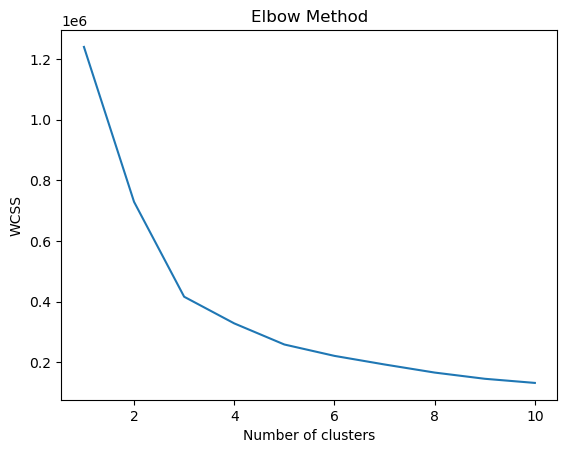

In [80]:
#Finding the most optimal cluster
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

## We assign a cluster number to each row

- Each row in the df variable is being assigned a cluster number to show which cluster it belongs to.

In [81]:
df.dropna(inplace=True)

k_optimal = 3 #The optimal cluster is 3 using the elbow curve method.
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [82]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Cluster
0,1855-05-01,25.544,1.171,Acre,Brazil,1
1,1855-06-01,24.228,1.103,Acre,Brazil,1
2,1855-07-01,24.371,1.044,Acre,Brazil,1
3,1855-08-01,25.427,1.073,Acre,Brazil,1
4,1855-09-01,25.675,1.014,Acre,Brazil,1
...,...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China,1
645670,2013-05-01,21.634,0.578,Zhejiang,China,1
645671,2013-06-01,24.679,0.596,Zhejiang,China,1
645672,2013-07-01,29.272,1.340,Zhejiang,China,1


## Filtering out outliers

- The number of values per outlier is being compared to each other and the one with the least value is eliminated.

In [83]:
# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()

# Identify the cluster with fewer points
cluster_with_fewer_points = cluster_counts.idxmin()
print(f"Cluster with fewer points: {cluster_with_fewer_points}")

# Filter outliers in the cluster with fewer points
outliers = df[df['Cluster'] == cluster_with_fewer_points]


Cluster with fewer points: 0


In [84]:
outliers

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Cluster
1901,1743-11-01,4.537,2.943,Adygey,Russia,0
1906,1744-04-01,11.890,3.005,Adygey,Russia,0
1907,1744-05-01,13.252,2.920,Adygey,Russia,0
1908,1744-06-01,18.127,2.928,Adygey,Russia,0
1909,1744-07-01,20.885,2.907,Adygey,Russia,0
...,...,...,...,...,...,...
644043,1877-10-01,16.589,2.540,Zhejiang,China,0
644045,1877-12-01,7.237,2.761,Zhejiang,China,0
644046,1878-01-01,2.031,2.775,Zhejiang,China,0
644080,1880-11-01,10.747,2.230,Zhejiang,China,0


In [85]:
df_no_outliers = df[df['Cluster'] != cluster_with_fewer_points] #filtering outliers from the non-outliers and assigning the non-outliers to the df_no_outlier variable

In [86]:
df_no_outliers 

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Cluster
0,1855-05-01,25.544,1.171,Acre,Brazil,1
1,1855-06-01,24.228,1.103,Acre,Brazil,1
2,1855-07-01,24.371,1.044,Acre,Brazil,1
3,1855-08-01,25.427,1.073,Acre,Brazil,1
4,1855-09-01,25.675,1.014,Acre,Brazil,1
...,...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China,1
645670,2013-05-01,21.634,0.578,Zhejiang,China,1
645671,2013-06-01,24.679,0.596,Zhejiang,China,1
645672,2013-07-01,29.272,1.340,Zhejiang,China,1


## Analysis after outlier removal

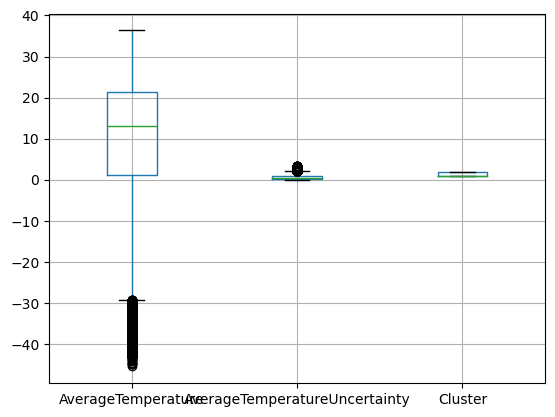

In [87]:
df_no_outliers.boxplot()
plt.show()

## Converting new dataset (dataset without outliers) to a .csv file

- The dataset with no outliers will now be converted to a .csv file called **cleaned_dataset_temperature_clustering.csv**

In [90]:
#The new dataset which doesn't contain the outliers.
df_no_outliers.to_csv('cleaned_dataset_temperature_clustering.csv', index=False)

In [92]:
pd.read_csv('cleaned_dataset_temperature_clustering.csv')

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Cluster
0,1855-05-01,25.544,1.171,Acre,Brazil,1
1,1855-06-01,24.228,1.103,Acre,Brazil,1
2,1855-07-01,24.371,1.044,Acre,Brazil,1
3,1855-08-01,25.427,1.073,Acre,Brazil,1
4,1855-09-01,25.675,1.014,Acre,Brazil,1
...,...,...,...,...,...,...
505912,2013-04-01,15.710,0.461,Zhejiang,China,1
505913,2013-05-01,21.634,0.578,Zhejiang,China,1
505914,2013-06-01,24.679,0.596,Zhejiang,China,1
505915,2013-07-01,29.272,1.340,Zhejiang,China,1
